In [9]:

#importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#%pip install plotly-express



In [10]:
#leer el archivo dataset 
dataset = pd.read_csv('amazonreviews.tsv', low_memory = False,sep ='\t')

In [11]:
#Mostrar las cantidades de datos
dataset.head(5)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [12]:
dataset.shape

(10000, 2)

In [13]:
#informacion de dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


<Axes: xlabel='label'>

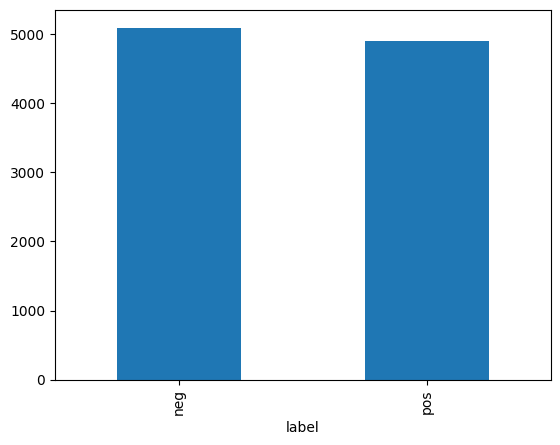

In [14]:
dataset['label'].value_counts().plot(kind='bar')


In [15]:
dataset.describe()

,label,review
count,10000,10000
unique,2,10000
top,neg,Stuning even for the non-gamer: This sound tra...
freq,5097,1


H0
 : no hay dificultad para usar la implementacion de un asistente virtual = 0

H1
 : si hay dificultad para usar la implementacion de un asistente virtual ≠0

In [16]:
dataset.groupby('label').size()


label
neg    5097
pos    4903
dtype: int64

In [17]:
dataset_table= pd.crosstab(dataset['label'],dataset['review'])
print(dataset_table)


review  !!!! Wrong MP3 files !!!!: The MP3 files downloadable from this site are not for Parsifal but Verdi's Traviata. Amazon needs to fix this urgently.  \
label                                                                                                                                                        
neg                                                     1                                                                                                    
pos                                                     0                                                                                                    

review  $ Scam: The songs on Sliver are easily some of the best of the box but the completely ignored some of the best, also. Its said for me to watch the "Nirvana Corp." aka Courtney Love to do something like this. Ultimately, if you don't realize that this is a shtik for $ then you must be confused. Nirvana released a best of cd and then a best of the box? Im jus

In [18]:
dataset_table.values 


array([[1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [19]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[1 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 1]]


In [20]:
val=stats.chi2_contingency(dataset_table)


In [21]:
val

Chi2ContingencyResult(statistic=10000.0, pvalue=0.4952983945386835, dof=9999, expected_freq=array([[0.5097, 0.5097, 0.5097, ..., 0.5097, 0.5097, 0.5097],
       [0.4903, 0.4903, 0.4903, ..., 0.4903, 0.4903, 0.4903]]))

In [22]:
Expected_Values=val[3]


In [23]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [24]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
     

In [25]:
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 1.9238767902687854


In [26]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [27]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.16542991458250356
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.16542991458250356


In [84]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [85]:
review_datos = pd.read_csv('amazonreviews.tsv', low_memory = False,sep ='\t')
review_datos.head(5)


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [46]:
review_datos.shape

(10000, 2)

In [47]:
review_datos['label'].value_counts()


label
neg    5097
pos    4903
Name: count, dtype: int64

In [48]:
review_datos.isnull().sum()
review_datos.dropna(inplace=True)

<Axes: ylabel='count'>

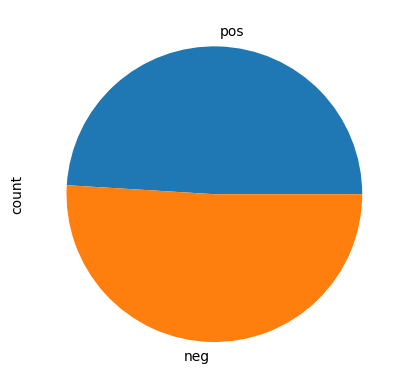

In [49]:
review_datos['label'].value_counts().sort_values().plot(kind = 'pie')


In [50]:
blanks = [] 

for i,lb,rv in review_datos.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)     
        
review_datos.drop(blanks, inplace=True)

In [55]:
from sklearn.model_selection import train_test_split

X=review_datos['review']
y=review_datos['label']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.pipeline import Pipeline 

#Training the model 
from sklearn.linear_model import LogisticRegression
# The pipeline: tf-idf vectorizer and logistic regression model  
lr_model=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf',LogisticRegression(solver='lbfgs'))])

lr_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [61]:
#Visualizing Classification Report 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

predictions= lr_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)

#df_report.style.background_gradient(cmap='greens').set_precision(2)
cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.840000,0.880000,0.860000,1649.000000
pos,0.870000,0.830000,0.850000,1651.000000
accuracy,0.850000,0.850000,0.850000,0.850000
macro avg,0.850000,0.850000,0.850000,3300.000000
weighted avg,0.850000,0.850000,0.850000,3300.000000


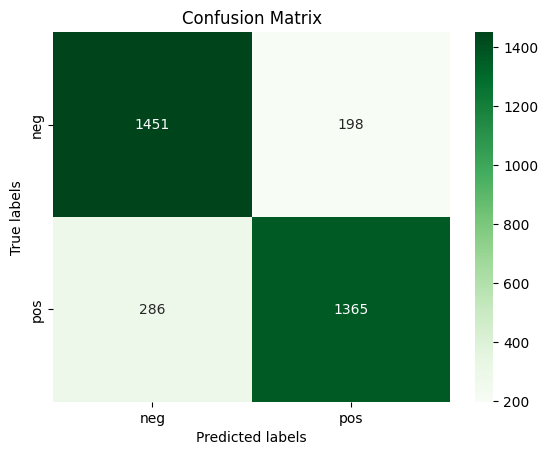

In [65]:
#Visualizing Confusion Matrix 
import matplotlib.pyplot as plt
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);